In [244]:
import chess.pgn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import statsmodels.api as sm

# Loading Data and Parsing

Load and parse a `.pgn` file with all the games from FIDE World Cup 2019 using `chess.pgn`. [Documentation](https://python-chess.readthedocs.io/en/v0.28.3/pgn.html)

In [245]:
path = "./Data/wcup19.pgn"
tournament = open(path)

first_headers = chess.pgn.read_headers(tournament)
# second_game = chess.pgn.read_game(tournament)
# third_game = chess.pgn.read_game(tournament)

In [246]:
print(first_headers)

Headers(Event='FIDE World Cup 2019', Site='Khanty-Mansiysk RUS', Date='2019.09.10', Round='1.1', White='Press, Shaun', Black='Ding, Liren', Result='0-1', BlackElo='2811', BlackFideId='8603677', BlackTitle='GM', ECO='B26', EventDate='2019.09.10', Opening='Sicilian', Variation='closed, 6.Be3', WhiteElo='1954', WhiteFideId='9100075', WhiteTitle='FM')


In [247]:
first_headers['Event']

'FIDE World Cup 2019'

In [232]:
type(first_game)

chess.pgn.Game

In [233]:
first_game.headers['Event']

'FIDE World Cup 2019'

In [234]:
print(second_game)

[Event "FIDE World Cup 2019"]
[Site "Khanty-Mansiysk RUS"]
[Date "2019.09.10"]
[Round "1.1"]
[White "Giri, Anish"]
[Black "Mohammad Fahad, Rahman"]
[Result "1-0"]
[BlackElo "2250"]
[BlackFideId "10207791"]
[BlackTitle "FM"]
[ECO "B52"]
[EventDate "2019.09.10"]
[Opening "Sicilian"]
[Variation "Canal-Sokolsky attack, Sokolsky variation"]
[WhiteElo "2780"]
[WhiteFideId "24116068"]
[WhiteTitle "GM"]

1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. Bxd7+ Qxd7 5. c4 Nc6 6. Nc3 Nf6 7. d4 cxd4 8. Nxd4 e6 9. O-O Rc8 10. Nf3 Be7 11. Qe2 a6 12. Bf4 Qc7 13. c5 Ne5 14. Rac1 Qb8 15. Bxe5 dxe5 16. Na4 O-O 17. b4 Nd7 18. Rfd1 Rfd8 19. g3 Qc7 20. a3 h6 21. h4 Qc6 22. Qc2 a5 23. Rb1 axb4 24. axb4 Qb5 25. Nc3 Qc6 26. Qa4 Qxa4 27. Nxa4 Nf6 28. Nb6 Rxd1+ 29. Rxd1 Rd8 30. Re1 Rd3 31. Nxe5 Rb3 32. Nc8 Bf8 33. Nd6 Rxb4 34. Nexf7 Nd7 35. Rc1 Rd4 36. c6 bxc6 37. Rxc6 Nf6 38. e5 Nd7 39. Rc8 Kh7 40. h5 g5 41. Rc7 Nb6 42. Nxg5+ Kg8 43. Nxe6 Rd1+ 44. Kg2 Bxd6 45. exd6 Rxd6 46. Rg7+ Kh8 47. Rg6 1-0


In [235]:
#outputs `Headers` object

In [236]:
#first_game.headers['Variation']

In [243]:
second_game.read_headers['Event']

AttributeError: 'Game' object has no attribute 'read_headers'

In [238]:
third_game.headers['Event']

'FIDE World Cup 2019'

Load all of the games into a DataFrame with relevant fields

In [239]:
params = ['Event', 'WhiteElo', 'BlackElo', 'ECO', 'Opening', 'Result', 'WhiteFideId', 'BlackFideId' ]

In [240]:
# def parse_pgn(file, params):
#     games_df = pd.DataFrame(columns = params)
#     for game in file:
#         cur_game = chess.pgn.read_game(file)
#         cur_row = [cur_game.headers[info] for info in params]
#         games_df.append(cur_row)
#     return games_df

In [241]:
#parse_pgn(tournament, params)

In [248]:
list_of_games = []
for game in tournament:
    cur_game = chess.pgn.read_headers(tournament) # remember to reload each time
    list_of_games.append(cur_game)
#     cur_row = [cur_game.headers[info] for info in params]
#     list_of_games.append(cur_row)
list_of_games

[Headers(Site='Khanty-Mansiysk RUS', Date='2019.09.10', Round='1.1', White='Giri, Anish', Black='Mohammad Fahad, Rahman', Result='1-0', BlackElo='2250', BlackFideId='10207791', BlackTitle='FM', ECO='B52', EventDate='2019.09.10', Opening='Sicilian', Variation='Canal-Sokolsky attack, Sokolsky variation', WhiteElo='2780', WhiteFideId='24116068', WhiteTitle='GM'),
 Headers(Site='Khanty-Mansiysk RUS', Date='2019.09.10', Round='1.1', White='Anwuli, Daniel', Black='Vachier-Lagrave, Maxime', Result='0-1', BlackElo='2774', BlackFideId='623539', BlackTitle='GM', ECO='A29', EventDate='2019.09.10', Opening='English', Variation='four knights, kingside fianchetto', WhiteElo='2284', WhiteFideId='8504580', WhiteTitle='IM'),
 Headers(Site='Khanty-Mansiysk RUS', Date='2019.09.10', Round='1.1', White='So, Wesley', Black='Duran Vega, Sergio', Result='1-0', BlackElo='2387', BlackFideId='6501311', BlackTitle='IM', ECO='A20', EventDate='2019.09.10', Opening='English opening', WhiteElo='2767', WhiteFideId='52

In [212]:
list_of_games

[]

In [213]:
cur_game.headers['Event']

'?'

In [125]:
games_df = pd.DataFrame(list_of_games, columns = params)

In [126]:
games_df

,Event,WhiteElo,BlackElo,ECO,Opening,Result,WhiteFideId,BlackFideId
0,?,2767,2387,A20,English opening,1-0,5202213,6501311
1,?,2407,2776,B90,Sicilian,0-1,4902980,4168119
2,?,2758,2431,A36,English,1/2-1/2,13300474,10600140
3,?,2428,2767,B15,Caro-Kann,0-1,13100050,13401319
4,?,2763,2504,B40,Sicilian,1-0,3503240,4400801
...,...,...,...,...,...,...,...,...
428,?,2758,2811,D40,QGD,1/2-1/2,13400924,8603677
429,?,2811,2758,A05,Reti opening,0-1,8603677,13400924
430,?,2758,2811,B59,Sicilian,1-0,13400924,8603677
431,?,2774,2763,B40,Sicilian defence,1-0,623539,8603820


Doing some EDA

In [52]:
games_df.describe()

,WhiteElo,BlackElo,ECO,Opening,Result
count,426,426,426,426,426
unique,100,100,153,53,3
top,2763,2763,C50,Ruy Lopez,1/2-1/2
freq,26,24,14,52,220


In [53]:
games_df.dtypes

WhiteElo    object
BlackElo    object
ECO         object
Opening     object
Result      object
dtype: object

In [54]:
games_df['WhiteElo'] = games_df['WhiteElo'].astype(int)

In [55]:
games_df['BlackElo'] = games_df['BlackElo'].astype(int)

In [56]:
games_df

,WhiteElo,BlackElo,ECO,Opening,Result
0,1954,2811,B26,Sicilian,0-1
1,2780,2250,B52,Sicilian,1-0
2,2284,2774,A29,English,0-1
3,2767,2387,A20,English opening,1-0
4,2407,2776,B90,Sicilian,0-1
...,...,...,...,...,...
421,2763,2774,D97,Gruenfeld,1/2-1/2
422,2811,2758,A19,English,1-0
423,2774,2763,C42,Petrov,1/2-1/2
424,2758,2811,C89,Ruy Lopez,1-0


This tournament had 426 games.

In [57]:
games_df.describe()

,WhiteElo,BlackElo
count,426.000000,426.000000
mean,2681.532864,2681.950704
std,85.130848,85.354347
min,1954.000000,1954.000000
25%,2635.000000,2635.000000
50%,2687.000000,2688.000000
75%,2746.000000,2746.000000
max,2811.000000,2811.000000


In [58]:
games_df['ECO'].nunique()

153

In [59]:
games_df['Opening'].nunique()

53

In [60]:
games_df['Result'].unique()

array(['0-1', '1-0', '1/2-1/2'], dtype=object)

In [61]:
games_df_ECOs = games_df.groupby('ECO')
games_df_ECOs.size().sort_values(ascending = False)

ECO
C50    14
C65    12
C53    12
C67    11
C42    10
       ..
C69     1
C72     1
C76     1
C80     1
A00     1
Length: 153, dtype: int64

Most popular ECO opening is C50 'Giuoco Piano'

In [62]:
# Make a DF where the indices are the Openings and columns are Instances, Frequency, White Win Ratio, Black Win Ratio, Draw Ratio, White Win Effectiveness, Black Win Effectiveness, Draw Effectiveness 
num_games = games_df.shape[0]
Instances = games_df.groupby('Opening').size().sort_values(ascending = False)
games_df_Open

NameError: name 'games_df_Openings_num' is not defined

Ruy Lopez is most popular named opening

In [70]:
# I want to find the most common opening for each of the three Results
# groupby Results, find number of times each Opening occurs, and sort in each `Result` 
Num_Openings_Results = games_df.groupby(['Result', 'Opening']).agg('size').reset_index() # How to do operation on one multi-index?
Num_Openings_Results_sorted = Num_Openings_Results.sort_values(['Result', 0], ascending = [True, False]) # ask about how to do this
pd.set_option('display.max_rows', 150)

In [71]:
Num_Openings_Results_sorted

,Result,Opening,0
6,0-1,English,8
17,0-1,QGD,7
24,0-1,Ruy Lopez,6
25,0-1,Sicilian,6
2,0-1,Caro-Kann,5
10,0-1,Giuoco Piano,4
12,0-1,King's Indian,4
16,0-1,QGA,4
7,0-1,English opening,3
9,0-1,Giuoco Pianissimo,3


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,
          2.,   2.,  10.,  32.,  63.,  91.,  72., 109.,  40.]),
 array([1954.  , 1996.85, 2039.7 , 2082.55, 2125.4 , 2168.25, 2211.1 ,
        2253.95, 2296.8 , 2339.65, 2382.5 , 2425.35, 2468.2 , 2511.05,
        2553.9 , 2596.75, 2639.6 , 2682.45, 2725.3 , 2768.15, 2811.  ]),
 <a list of 20 Patch objects>)

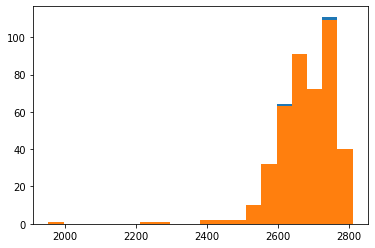

In [64]:
# histograms of ELO
plt.hist(games_df['WhiteElo'], bins = 20, label = 'WhiteElo Distribution')
plt.hist(games_df['BlackElo'], bins = 20, label = 'BlackElo Distribution')
# Use FIDE ID whenever possible because those should be unique

In [65]:
# Make pie chart of openings
plt.pie(games_df_Openings_num, labels = games_df_Openings_num.index);

NameError: name 'games_df_Openings_num' is not defined

In [ ]:
# Take Ruy Lopez and make histogram of it over White Elo
Ruy_Lopez_games = games_df_Openings.get_group('Ruy Lopez')
plt.hist(Ruy_Lopez_games['WhiteElo'])
# distribution depends on the distribution of Elo

In [ ]:
# Get Ratios for Openings
games_df_Openings_num

In [36]:
# find which openings take control/attack the center,
# this is gonna be harder to do

## Linear Regression